In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import losses
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import xlsxwriter



#Bring in all data for all years. This notebook contains Joseph's classifiers from 0-3 for risk groups. Col 151 is risk groups.
ct_sheet = pd.ExcelFile("SA_and_CT_AALandfROI_08272019.xlsx") 

Using TensorFlow backend.


In [2]:
print(ct_sheet.sheet_names[9])

Destrieux_CT


W1122 09:41:00.511995 19940 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1122 09:41:00.611241 19940 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 09:41:00.640990 19940 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(1888, 148)
Tensor("input_1:0", shape=(?, 148), dtype=float32)


W1122 09:41:01.381709 19940 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1122 09:41:02.543722 19940 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1122 09:41:04.923764 19940 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1699 samples, validate on 189 samples
Epoch 1/1500
1699/1699 [==============================] - 12s 7ms/step - loss: 0.1073 - val_loss: 0.0794
Epoch 2/1500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.0786 - val_loss: 0.0732
Epoch 3/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0743 - val_loss: 0.0701
Epoch 4/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0705 - val_loss: 0.0688
Epoch 5/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0691 - val_loss: 0.0677
Epoch 6/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0676 - val_loss: 0.0655
Epoch 7/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0670 - val_loss: 0.0653
Epoch 8/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0655 - val_loss: 0.0646
Epoch 9/1500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.0649 - val_loss: 0.0644
Epoch 10/1500
16

1699/1699 [==============================] - 2s 1ms/step - loss: 0.0589 - val_loss: 0.0594
Epoch 154/1500
1699/1699 [==============================] - ETA: 0s - loss: 0.058 - 2s 1ms/step - loss: 0.0586 - val_loss: 0.0590
Epoch 155/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0588 - val_loss: 0.0589
Epoch 156/1500
1699/1699 [==============================] - 2s 993us/step - loss: 0.0587 - val_loss: 0.0590
Epoch 157/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0588 - val_loss: 0.0609
Epoch 158/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0588 - val_loss: 0.0590
Epoch 159/1500
1699/1699 [==============================] - 2s 939us/step - loss: 0.0589 - val_loss: 0.0591
Epoch 160/1500
1699/1699 [==============================] - 2s 943us/step - loss: 0.0587 - val_loss: 0.0591
Epoch 161/1500
1699/1699 [==============================] - 2s 907us/step - loss: 0.0588 - val_loss: 0.0589
Epoch 162/1500
1699/1699 [===

1699/1699 [==============================] - 3s 2ms/step - loss: 0.0580 - val_loss: 0.0589
Epoch 306/1500
1699/1699 [==============================] - 5s 3ms/step - loss: 0.0584 - val_loss: 0.0590
Epoch 307/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0581 - val_loss: 0.0591
Epoch 308/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0583 - val_loss: 0.0590
Epoch 309/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0583 - val_loss: 0.0599
Epoch 310/1500
1699/1699 [==============================] - 1s 871us/step - loss: 0.0582 - val_loss: 0.0590
Epoch 311/1500
1699/1699 [==============================] - 2s 920us/step - loss: 0.0580 - val_loss: 0.0586
Epoch 312/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0579 - val_loss: 0.0588
Epoch 313/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0581 - val_loss: 0.0592
Epoch 314/1500
1699/1699 [==============================]

Epoch 457/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0577 - val_loss: 0.0588 - ETA: 0s - los
Epoch 458/1500
1699/1699 [==============================] - 1s 712us/step - loss: 0.0577 - val_loss: 0.0592
Epoch 459/1500
1699/1699 [==============================] - 1s 801us/step - loss: 0.0577 - val_loss: 0.0588
Epoch 460/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0577 - val_loss: 0.0595
Epoch 461/1500
1699/1699 [==============================] - 3s 2ms/step - loss: 0.0577 - val_loss: 0.0591
Epoch 462/1500
1699/1699 [==============================] - 2s 1ms/step - loss: 0.0576 - val_loss: 0.0587
Epoch 463/1500
1699/1699 [==============================] - 1s 768us/step - loss: 0.0576 - val_loss: 0.0593
Epoch 464/1500
1699/1699 [==============================] - 2s 942us/step - loss: 0.0576 - val_loss: 0.0586
Epoch 465/1500
1699/1699 [==============================] - 2s 944us/step - loss: 0.0576 - val_loss: 0.0590
Epoch 466/1500
1699/

Epoch 533/1500
1699/1699 [==============================] - 1s 608us/step - loss: 0.0574 - val_loss: 0.0588
Epoch 534/1500
1699/1699 [==============================] - 1s 563us/step - loss: 0.0576 - val_loss: 0.0589
Epoch 535/1500
1699/1699 [==============================] - 1s 529us/step - loss: 0.0575 - val_loss: 0.0586
Epoch 536/1500
1699/1699 [==============================] - 1s 442us/step - loss: 0.0576 - val_loss: 0.0587
Epoch 537/1500
1699/1699 [==============================] - 1s 463us/step - loss: 0.0575 - val_loss: 0.0587
Epoch 538/1500
1699/1699 [==============================] - 1s 481us/step - loss: 0.0575 - val_loss: 0.0588
Epoch 539/1500
1699/1699 [==============================] - 1s 472us/step - loss: 0.0575 - val_loss: 0.0589
Epoch 540/1500
1699/1699 [==============================] - 1s 464us/step - loss: 0.0575 - val_loss: 0.0586
Epoch 541/1500
1699/1699 [==============================] - 1s 458us/step - loss: 0.0574 - val_loss: 0.0589
Epoch 542/1500
1699/1699 [==

Epoch 684/1500
1699/1699 [==============================] - 1s 489us/step - loss: 0.0573 - val_loss: 0.0591
Epoch 685/1500
1699/1699 [==============================] - 1s 507us/step - loss: 0.0573 - val_loss: 0.0586
Epoch 686/1500
1699/1699 [==============================] - 1s 540us/step - loss: 0.0573 - val_loss: 0.0590
Epoch 687/1500
1699/1699 [==============================] - 1s 513us/step - loss: 0.0572 - val_loss: 0.0586
Epoch 688/1500
1699/1699 [==============================] - 1s 513us/step - loss: 0.0571 - val_loss: 0.0588
Epoch 689/1500
1699/1699 [==============================] - 1s 472us/step - loss: 0.0572 - val_loss: 0.0593
Epoch 690/1500
1699/1699 [==============================] - 1s 481us/step - loss: 0.0573 - val_loss: 0.0589
Epoch 691/1500
1699/1699 [==============================] - 1s 480us/step - loss: 0.0575 - val_loss: 0.0589
Epoch 692/1500
1699/1699 [==============================] - 1s 551us/step - loss: 0.0573 - val_loss: 0.0587
Epoch 693/1500
1699/1699 [==

Epoch 760/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0571 - val_loss: 0.0591
Epoch 761/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0571 - val_loss: 0.0593
Epoch 762/1500
1699/1699 [==============================] - 0s 164us/step - loss: 0.0571 - val_loss: 0.0586
Epoch 763/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0571 - val_loss: 0.0591
Epoch 764/1500
1699/1699 [==============================] - 0s 190us/step - loss: 0.0571 - val_loss: 0.0591
Epoch 765/1500
1699/1699 [==============================] - 0s 164us/step - loss: 0.0574 - val_loss: 0.0590
Epoch 766/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0571 - val_loss: 0.0589
Epoch 767/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0571 - val_loss: 0.0588
Epoch 768/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0570 - val_loss: 0.0587
Epoch 769/1500
1699/1699 [==

Epoch 836/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0570 - val_loss: 0.0587
Epoch 837/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0571 - val_loss: 0.0587
Epoch 838/1500
1699/1699 [==============================] - 0s 164us/step - loss: 0.0570 - val_loss: 0.0588
Epoch 839/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0570 - val_loss: 0.0588
Epoch 840/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0570 - val_loss: 0.0588
Epoch 841/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0569 - val_loss: 0.0588
Epoch 842/1500
1699/1699 [==============================] - 0s 159us/step - loss: 0.0570 - val_loss: 0.0589
Epoch 843/1500
1699/1699 [==============================] - 0s 173us/step - loss: 0.0570 - val_loss: 0.0590
Epoch 844/1500
1699/1699 [==============================] - 0s 237us/step - loss: 0.0570 - val_loss: 0.0586
Epoch 845/1500
1699/1699 [==

Epoch 912/1500
1699/1699 [==============================] - 0s 164us/step - loss: 0.0571 - val_loss: 0.0591
Epoch 913/1500
1699/1699 [==============================] - ETA: 0s - loss: 0.057 - 0s 169us/step - loss: 0.0571 - val_loss: 0.0593
Epoch 914/1500
1699/1699 [==============================] - 0s 157us/step - loss: 0.0569 - val_loss: 0.0591
Epoch 915/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0569 - val_loss: 0.0588
Epoch 916/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0568 - val_loss: 0.0588
Epoch 917/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0567 - val_loss: 0.0586
Epoch 918/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0572 - val_loss: 0.0591
Epoch 919/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0569 - val_loss: 0.0586
Epoch 920/1500
1699/1699 [==============================] - 0s 166us/step - loss: 0.0568 - val_loss: 0.0589
Epoc

1699/1699 [==============================] - 1s 395us/step - loss: 0.0566 - val_loss: 0.0590
Epoch 1063/1500
1699/1699 [==============================] - 0s 164us/step - loss: 0.0566 - val_loss: 0.0589
Epoch 1064/1500
1699/1699 [==============================] - 0s 172us/step - loss: 0.0566 - val_loss: 0.0589
Epoch 1065/1500
1699/1699 [==============================] - 0s 172us/step - loss: 0.0566 - val_loss: 0.0591
Epoch 1066/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0567 - val_loss: 0.0591
Epoch 1067/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0567 - val_loss: 0.0592
Epoch 1068/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0568 - val_loss: 0.0588
Epoch 1069/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0565 - val_loss: 0.0589
Epoch 1070/1500
1699/1699 [==============================] - 0s 155us/step - loss: 0.0566 - val_loss: 0.0594
Epoch 1071/1500
1699/1699 [========

1699/1699 [==============================] - 1s 314us/step - loss: 0.0565 - val_loss: 0.0589
Epoch 1213/1500
1699/1699 [==============================] - 1s 326us/step - loss: 0.0566 - val_loss: 0.0590
Epoch 1214/1500
1699/1699 [==============================] - 1s 316us/step - loss: 0.0566 - val_loss: 0.0589
Epoch 1215/1500
1699/1699 [==============================] - 1s 333us/step - loss: 0.0564 - val_loss: 0.0588
Epoch 1216/1500
1699/1699 [==============================] - 1s 381us/step - loss: 0.0565 - val_loss: 0.0592
Epoch 1217/1500
1699/1699 [==============================] - 1s 308us/step - loss: 0.0566 - val_loss: 0.0589
Epoch 1218/1500
1699/1699 [==============================] - 1s 323us/step - loss: 0.0565 - val_loss: 0.0590
Epoch 1219/1500
1699/1699 [==============================] - 1s 313us/step - loss: 0.0565 - val_loss: 0.0589
Epoch 1220/1500
1699/1699 [==============================] - 1s 317us/step - loss: 0.0565 - val_loss: 0.0591
Epoch 1221/1500
1699/1699 [========

1699/1699 [==============================] - 0s 168us/step - loss: 0.0563 - val_loss: 0.0592
Epoch 1363/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0564 - val_loss: 0.0591
Epoch 1364/1500
1699/1699 [==============================] - 0s 159us/step - loss: 0.0564 - val_loss: 0.0589
Epoch 1365/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0563 - val_loss: 0.0593
Epoch 1366/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0565 - val_loss: 0.0595
Epoch 1367/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0565 - val_loss: 0.0595
Epoch 1368/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0564 - val_loss: 0.0589
Epoch 1369/1500
1699/1699 [==============================] - 0s 168us/step - loss: 0.0563 - val_loss: 0.0590
Epoch 1370/1500
1699/1699 [==============================] - 0s 177us/step - loss: 0.0563 - val_loss: 0.0590
Epoch 1371/1500
1699/1699 [========

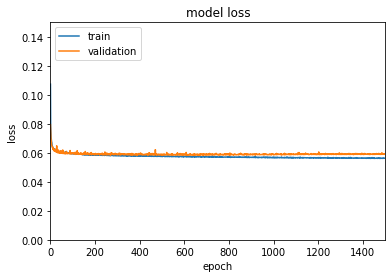

In [3]:
#Will create a large function to apply to the 4 CT Scans for each year.
parsee = ct_sheet.sheet_names[9]
data = ct_sheet.parse(parsee)
data_features = data.loc[:, data.columns] 
data_features = data_features.drop(['Case','Visit','ROI42','ROI117'], axis=1)  
#Get rid of subject names to only have features now. #Need to remove ROIs. They don't convert to floats.
#Get rid of ctx_rh_Medial_wall and ctx_lh_Medial_wall, not needed for analysis.
#Have to standardize data. Scikit learn here. Need to create stratified K folds to avoid uneven distribution of risk groups.pcaCT1Y = PCA(n_components=150) #150 Features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_features)

ct_sheet = pd.ExcelFile("ctAutoEncoder.xlsx") 
parsee = ct_sheet.sheet_names[0]
data = ct_sheet.parse(parsee)
data_features = data.loc[:, data.columns] 
data_features = data_features.drop(['norm_id','AtRisk',11142,12142,'Age'], axis=1)  
scaled_data = scaler.transform(data_features)

print(scaled_data.shape)
X_train, X_test = train_test_split(scaled_data, test_size=0.10, random_state=20)

#Size of encoded representation
input_size = 148
hidden_size3 = 120
hidden_size2 = 65
hidden_size1 = 30
encoding_dim = 13 # 13 floats -> compression of factor ~11.5, assuming the input is 150 floats

# Input Placeholder
input_data = Input(shape=(input_size,))
print(input_data)
# "encoded" is the encoded representation of the input
hidden_e_3 = Dense(hidden_size3, activation='tanh')(input_data)
hidden_e_2 = Dense(hidden_size2, activation='tanh')(hidden_e_3)
hidden_e_1 = Dense(hidden_size1, activation='tanh')(hidden_e_2) 
encoded = Dense(encoding_dim, activation='tanh')(hidden_e_1)
# "decoded" is the lossy reconstruction of the input
hidden_d_1 = Dense(hidden_size1, activation='tanh')(encoded)
hidden_d_2 = Dense(hidden_size2, activation='tanh')(hidden_d_1)
hidden_d_3 = Dense(hidden_size3, activation='tanh')(hidden_d_2)
decoded = Dense(input_size, activation='tanh')(hidden_d_3) #Decoded layers and activation function. Needs to return to 151.
# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)
# configure our model to use mean_absolute_error loss function, and the Adam optimizer:
autoencoder.compile(optimizer='Adam', loss='mean_absolute_error')

ac = autoencoder.fit(X_train, X_train,
epochs=1500,
batch_size=15,
shuffle=True,
validation_data=(X_test, X_test))

#print(ac.history.keys())
# "Loss"
plt.plot(ac.history['loss'])
plt.plot(ac.history['val_loss'])
#plt.set(xlim=(0, 50), ylim=(0.0, 1.0))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 1500, 0.0, 0.15])
plt.show()


Train on 602 samples, validate on 67 samples
Epoch 1/1500
602/602 [==============================] - 2s 4ms/step - loss: 0.1036 - val_loss: 0.0755
Epoch 2/1500
602/602 [==============================] - 1s 911us/step - loss: 0.0718 - val_loss: 0.0670
Epoch 3/1500
602/602 [==============================] - 1s 880us/step - loss: 0.0660 - val_loss: 0.0634
Epoch 4/1500
602/602 [==============================] - 1s 918us/step - loss: 0.0629 - val_loss: 0.0624
Epoch 5/1500
602/602 [==============================] - 1s 996us/step - loss: 0.0607 - val_loss: 0.0596
Epoch 6/1500
602/602 [==============================] - 1s 936us/step - loss: 0.0590 - val_loss: 0.0583
Epoch 7/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0575 - val_loss: 0.0571
Epoch 8/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0565 - val_loss: 0.0566
Epoch 9/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0557 - val_loss: 0.0554
Epoch 10/1500
602/602 [====

602/602 [==============================] - 1s 2ms/step - loss: 0.0518 - val_loss: 0.0530
Epoch 80/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0517 - val_loss: 0.0531
Epoch 81/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0518 - val_loss: 0.0530
Epoch 82/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0517 - val_loss: 0.0529
Epoch 83/1500
602/602 [==============================] - 1s 921us/step - loss: 0.0515 - val_loss: 0.0528
Epoch 84/1500
602/602 [==============================] - 1s 910us/step - loss: 0.0516 - val_loss: 0.0529
Epoch 85/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0517 - val_loss: 0.0529
Epoch 86/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0516 - val_loss: 0.0528
Epoch 87/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0516 - val_loss: 0.0528
Epoch 88/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0516

602/602 [==============================] - 0s 716us/step - loss: 0.0513 - val_loss: 0.0529
Epoch 157/1500
602/602 [==============================] - 0s 724us/step - loss: 0.0513 - val_loss: 0.0528
Epoch 158/1500
602/602 [==============================] - 0s 782us/step - loss: 0.0512 - val_loss: 0.0526
Epoch 159/1500
602/602 [==============================] - 0s 733us/step - loss: 0.0512 - val_loss: 0.0527
Epoch 160/1500
602/602 [==============================] - 0s 708us/step - loss: 0.0512 - val_loss: 0.0527
Epoch 161/1500
602/602 [==============================] - 0s 748us/step - loss: 0.0512 - val_loss: 0.0527
Epoch 162/1500
602/602 [==============================] - 1s 974us/step - loss: 0.0515 - val_loss: 0.0527
Epoch 163/1500
602/602 [==============================] - 0s 739us/step - loss: 0.0513 - val_loss: 0.0526
Epoch 164/1500
602/602 [==============================] - 0s 686us/step - loss: 0.0513 - val_loss: 0.0526
Epoch 165/1500
602/602 [==============================] - 0s 

602/602 [==============================] - 0s 756us/step - loss: 0.0510 - val_loss: 0.0526
Epoch 234/1500
602/602 [==============================] - 0s 707us/step - loss: 0.0508 - val_loss: 0.0526
Epoch 235/1500
602/602 [==============================] - 0s 711us/step - loss: 0.0509 - val_loss: 0.0525
Epoch 236/1500
602/602 [==============================] - 0s 735us/step - loss: 0.0509 - val_loss: 0.0527
Epoch 237/1500
602/602 [==============================] - 1s 994us/step - loss: 0.0509 - val_loss: 0.0529
Epoch 238/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0509 - val_loss: 0.0526
Epoch 239/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0509 - val_loss: 0.0526
Epoch 240/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0509 - val_loss: 0.0527
Epoch 241/1500
602/602 [==============================] - 1s 911us/step - loss: 0.0509 - val_loss: 0.0526
Epoch 242/1500
602/602 [==============================] - 1s 1ms/st

602/602 [==============================] - 1s 1ms/step - loss: 0.0507 - val_loss: 0.0525
Epoch 311/1500
602/602 [==============================] - 0s 703us/step - loss: 0.0508 - val_loss: 0.0526
Epoch 312/1500
602/602 [==============================] - 0s 762us/step - loss: 0.0506 - val_loss: 0.0525
Epoch 313/1500
602/602 [==============================] - 0s 726us/step - loss: 0.0506 - val_loss: 0.0528
Epoch 314/1500
602/602 [==============================] - 0s 720us/step - loss: 0.0508 - val_loss: 0.0528
Epoch 315/1500
602/602 [==============================] - 0s 716us/step - loss: 0.0507 - val_loss: 0.0527
Epoch 316/1500
602/602 [==============================] - 0s 723us/step - loss: 0.0506 - val_loss: 0.0526
Epoch 317/1500
602/602 [==============================] - 0s 780us/step - loss: 0.0506 - val_loss: 0.0530
Epoch 318/1500
602/602 [==============================] - 1s 990us/step - loss: 0.0507 - val_loss: 0.0527
Epoch 319/1500
602/602 [==============================] - 1s 2m

602/602 [==============================] - 1s 1ms/step - loss: 0.0506 - val_loss: 0.0527
Epoch 388/1500
602/602 [==============================] - 1s 882us/step - loss: 0.0506 - val_loss: 0.0527
Epoch 389/1500
602/602 [==============================] - 1s 861us/step - loss: 0.0506 - val_loss: 0.0525
Epoch 390/1500
602/602 [==============================] - 1s 906us/step - loss: 0.0509 - val_loss: 0.0525
Epoch 391/1500
602/602 [==============================] - 1s 882us/step - loss: 0.0505 - val_loss: 0.0524
Epoch 392/1500
602/602 [==============================] - 0s 824us/step - loss: 0.0505 - val_loss: 0.0525
Epoch 393/1500
602/602 [==============================] - 0s 810us/step - loss: 0.0505 - val_loss: 0.0524
Epoch 394/1500
602/602 [==============================] - 1s 867us/step - loss: 0.0505 - val_loss: 0.0527
Epoch 395/1500
602/602 [==============================] - 1s 895us/step - loss: 0.0506 - val_loss: 0.0527
Epoch 396/1500
602/602 [==============================] - 1s 1m

602/602 [==============================] - 1s 856us/step - loss: 0.0506 - val_loss: 0.0524
Epoch 465/1500
602/602 [==============================] - 1s 942us/step - loss: 0.0504 - val_loss: 0.0525
Epoch 466/1500
602/602 [==============================] - 1s 864us/step - loss: 0.0503 - val_loss: 0.0527
Epoch 467/1500
602/602 [==============================] - 1s 925us/step - loss: 0.0504 - val_loss: 0.0526
Epoch 468/1500
602/602 [==============================] - ETA: 0s - loss: 0.050 - 1s 1ms/step - loss: 0.0503 - val_loss: 0.0524
Epoch 469/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0503 - val_loss: 0.0524
Epoch 470/1500
602/602 [==============================] - 2s 3ms/step - loss: 0.0503 - val_loss: 0.0523
Epoch 471/1500
602/602 [==============================] - 2s 3ms/step - loss: 0.0504 - val_loss: 0.0527
Epoch 472/1500
602/602 [==============================] - 2s 3ms/step - loss: 0.0506 - val_loss: 0.0526s - lo
Epoch 473/1500
602/602 [=================

602/602 [==============================] - 1s 1ms/step - loss: 0.0505 - val_loss: 0.0526
Epoch 542/1500
602/602 [==============================] - 1s 988us/step - loss: 0.0501 - val_loss: 0.0528
Epoch 543/1500
602/602 [==============================] - 0s 796us/step - loss: 0.0502 - val_loss: 0.0525
Epoch 544/1500
602/602 [==============================] - 0s 717us/step - loss: 0.0502 - val_loss: 0.0524
Epoch 545/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0501 - val_loss: 0.0523
Epoch 546/1500
602/602 [==============================] - 0s 712us/step - loss: 0.0507 - val_loss: 0.0525
Epoch 547/1500
602/602 [==============================] - 0s 788us/step - loss: 0.0502 - val_loss: 0.0523
Epoch 548/1500
602/602 [==============================] - 0s 639us/step - loss: 0.0501 - val_loss: 0.0524
Epoch 549/1500
602/602 [==============================] - 1s 893us/step - loss: 0.0502 - val_loss: 0.0524
Epoch 550/1500
602/602 [==============================] - 1s 1ms/

602/602 [==============================] - 1s 2ms/step - loss: 0.0505 - val_loss: 0.0524
Epoch 619/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0505 - val_loss: 0.0527
Epoch 620/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0501 - val_loss: 0.0526
Epoch 621/1500
602/602 [==============================] - ETA: 0s - loss: 0.0500- ETA: 0s - loss - 1s 2ms/step - loss: 0.0500 - val_loss: 0.0526
Epoch 622/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0500 - val_loss: 0.0524
Epoch 623/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0500 - val_loss: 0.0525
Epoch 624/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0500 - val_loss: 0.0526
Epoch 625/1500
602/602 [==============================] - 2s 3ms/step - loss: 0.0500 - val_loss: 0.05240s - loss: 
Epoch 626/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0500 - val_loss: 0.0524
Epoch 627/1500
602/602 [===

602/602 [==============================] - 1s 898us/step - loss: 0.0499 - val_loss: 0.0525
Epoch 696/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0499 - val_loss: 0.0525
Epoch 697/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0499 - val_loss: 0.0525
Epoch 698/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.0525A: 0s - loss: 0.
Epoch 699/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.0523
Epoch 700/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0499 - val_loss: 0.0523
Epoch 701/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.0526
Epoch 702/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0499 - val_loss: 0.0526
Epoch 703/1500
602/602 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.0525
Epoch 704/1500
602/602 [==============================] - 1s 

602/602 [==============================] - 0s 639us/step - loss: 0.0499 - val_loss: 0.0524
Epoch 774/1500
602/602 [==============================] - 0s 723us/step - loss: 0.0497 - val_loss: 0.0525
Epoch 775/1500
602/602 [==============================] - 0s 667us/step - loss: 0.0497 - val_loss: 0.0525
Epoch 776/1500
602/602 [==============================] - 0s 637us/step - loss: 0.0497 - val_loss: 0.0524
Epoch 777/1500
602/602 [==============================] - 0s 673us/step - loss: 0.0497 - val_loss: 0.0525
Epoch 778/1500
602/602 [==============================] - 1s 859us/step - loss: 0.0498 - val_loss: 0.0526
Epoch 779/1500
602/602 [==============================] - 0s 657us/step - loss: 0.0498 - val_loss: 0.0525
Epoch 780/1500
602/602 [==============================] - 0s 666us/step - loss: 0.0498 - val_loss: 0.0525
Epoch 781/1500
602/602 [==============================] - 0s 326us/step - loss: 0.0496 - val_loss: 0.0526
Epoch 782/1500
602/602 [==============================] - 0s 

602/602 [==============================] - 0s 661us/step - loss: 0.0501 - val_loss: 0.0526
Epoch 851/1500
602/602 [==============================] - 0s 353us/step - loss: 0.0498 - val_loss: 0.0525
Epoch 852/1500
602/602 [==============================] - 0s 291us/step - loss: 0.0496 - val_loss: 0.0525
Epoch 853/1500
602/602 [==============================] - 0s 342us/step - loss: 0.0497 - val_loss: 0.0525
Epoch 854/1500
602/602 [==============================] - 0s 279us/step - loss: 0.0507 - val_loss: 0.0525
Epoch 855/1500
602/602 [==============================] - 0s 401us/step - loss: 0.0500 - val_loss: 0.0524
Epoch 856/1500
602/602 [==============================] - 0s 623us/step - loss: 0.0497 - val_loss: 0.0524
Epoch 857/1500
602/602 [==============================] - 0s 686us/step - loss: 0.0496 - val_loss: 0.0524
Epoch 858/1500
602/602 [==============================] - 0s 443us/step - loss: 0.0496 - val_loss: 0.0526
Epoch 859/1500
602/602 [==============================] - 0s 

602/602 [==============================] - 0s 542us/step - loss: 0.0497 - val_loss: 0.0525
Epoch 928/1500
602/602 [==============================] - 0s 330us/step - loss: 0.0495 - val_loss: 0.0525
Epoch 929/1500
602/602 [==============================] - 0s 385us/step - loss: 0.0495 - val_loss: 0.0526
Epoch 930/1500
602/602 [==============================] - 0s 309us/step - loss: 0.0495 - val_loss: 0.0524
Epoch 931/1500
602/602 [==============================] - 0s 307us/step - loss: 0.0495 - val_loss: 0.0524
Epoch 932/1500
602/602 [==============================] - 0s 271us/step - loss: 0.0494 - val_loss: 0.0525
Epoch 933/1500
602/602 [==============================] - 0s 358us/step - loss: 0.0499 - val_loss: 0.0525
Epoch 934/1500
602/602 [==============================] - 0s 311us/step - loss: 0.0499 - val_loss: 0.0524
Epoch 935/1500
602/602 [==============================] - 0s 406us/step - loss: 0.0496 - val_loss: 0.0525
Epoch 936/1500
602/602 [==============================] - 0s 

602/602 [==============================] - 0s 665us/step - loss: 0.0495 - val_loss: 0.0525
Epoch 1005/1500
602/602 [==============================] - 0s 405us/step - loss: 0.0493 - val_loss: 0.0525
Epoch 1006/1500
602/602 [==============================] - 0s 550us/step - loss: 0.0494 - val_loss: 0.0525
Epoch 1007/1500
602/602 [==============================] - 0s 385us/step - loss: 0.0493 - val_loss: 0.0525
Epoch 1008/1500
602/602 [==============================] - 0s 434us/step - loss: 0.0494 - val_loss: 0.0524
Epoch 1009/1500
602/602 [==============================] - 0s 380us/step - loss: 0.0493 - val_loss: 0.0525
Epoch 1010/1500
602/602 [==============================] - 1s 907us/step - loss: 0.0495 - val_loss: 0.0528
Epoch 1011/1500
602/602 [==============================] - 0s 684us/step - loss: 0.0495 - val_loss: 0.0525
Epoch 1012/1500
602/602 [==============================] - 0s 558us/step - loss: 0.0495 - val_loss: 0.0524
Epoch 1013/1500
602/602 [============================

602/602 [==============================] - 0s 312us/step - loss: 0.0494 - val_loss: 0.0525
Epoch 1081/1500
602/602 [==============================] - 0s 315us/step - loss: 0.0495 - val_loss: 0.0524
Epoch 1082/1500
602/602 [==============================] - 0s 284us/step - loss: 0.0493 - val_loss: 0.0524
Epoch 1083/1500
602/602 [==============================] - 0s 299us/step - loss: 0.0493 - val_loss: 0.0524
Epoch 1084/1500
602/602 [==============================] - 0s 305us/step - loss: 0.0493 - val_loss: 0.0523
Epoch 1085/1500
602/602 [==============================] - 0s 282us/step - loss: 0.0494 - val_loss: 0.0525
Epoch 1086/1500
602/602 [==============================] - 0s 305us/step - loss: 0.0493 - val_loss: 0.0524
Epoch 1087/1500
602/602 [==============================] - 0s 278us/step - loss: 0.0492 - val_loss: 0.0527
Epoch 1088/1500
602/602 [==============================] - 0s 272us/step - loss: 0.0492 - val_loss: 0.0525
Epoch 1089/1500
602/602 [============================

602/602 [==============================] - 0s 644us/step - loss: 0.0493 - val_loss: 0.0527
Epoch 1157/1500
602/602 [==============================] - 0s 351us/step - loss: 0.0493 - val_loss: 0.0523
Epoch 1158/1500
602/602 [==============================] - 0s 276us/step - loss: 0.0493 - val_loss: 0.0528
Epoch 1159/1500
602/602 [==============================] - 0s 306us/step - loss: 0.0498 - val_loss: 0.0525
Epoch 1160/1500
602/602 [==============================] - 0s 287us/step - loss: 0.0495 - val_loss: 0.0524
Epoch 1161/1500
602/602 [==============================] - 0s 412us/step - loss: 0.0493 - val_loss: 0.0528
Epoch 1162/1500
602/602 [==============================] - 0s 619us/step - loss: 0.0494 - val_loss: 0.0526
Epoch 1163/1500
602/602 [==============================] - 0s 703us/step - loss: 0.0493 - val_loss: 0.0524
Epoch 1164/1500
602/602 [==============================] - 0s 625us/step - loss: 0.0492 - val_loss: 0.0525
Epoch 1165/1500
602/602 [============================

602/602 [==============================] - 0s 622us/step - loss: 0.0493 - val_loss: 0.0524
Epoch 1233/1500
602/602 [==============================] - 0s 511us/step - loss: 0.0492 - val_loss: 0.0523
Epoch 1234/1500
602/602 [==============================] - 0s 489us/step - loss: 0.0492 - val_loss: 0.0525
Epoch 1235/1500
602/602 [==============================] - 0s 327us/step - loss: 0.0495 - val_loss: 0.0525
Epoch 1236/1500
602/602 [==============================] - 0s 501us/step - loss: 0.0493 - val_loss: 0.0525
Epoch 1237/1500
602/602 [==============================] - 0s 394us/step - loss: 0.0492 - val_loss: 0.0525
Epoch 1238/1500
602/602 [==============================] - 0s 428us/step - loss: 0.0492 - val_loss: 0.0524
Epoch 1239/1500
602/602 [==============================] - 0s 308us/step - loss: 0.0492 - val_loss: 0.0522
Epoch 1240/1500
602/602 [==============================] - 0s 546us/step - loss: 0.0492 - val_loss: 0.0527
Epoch 1241/1500
602/602 [============================

602/602 [==============================] - 0s 342us/step - loss: 0.0493 - val_loss: 0.0525
Epoch 1309/1500
602/602 [==============================] - 0s 493us/step - loss: 0.0492 - val_loss: 0.0525
Epoch 1310/1500
602/602 [==============================] - 0s 661us/step - loss: 0.0491 - val_loss: 0.0525
Epoch 1311/1500
602/602 [==============================] - 0s 719us/step - loss: 0.0491 - val_loss: 0.0524
Epoch 1312/1500
602/602 [==============================] - 0s 529us/step - loss: 0.0492 - val_loss: 0.0524
Epoch 1313/1500
602/602 [==============================] - 0s 370us/step - loss: 0.0491 - val_loss: 0.0524
Epoch 1314/1500
602/602 [==============================] - 0s 573us/step - loss: 0.0491 - val_loss: 0.0523
Epoch 1315/1500
602/602 [==============================] - 1s 975us/step - loss: 0.0498 - val_loss: 0.0525
Epoch 1316/1500
602/602 [==============================] - 0s 770us/step - loss: 0.0492 - val_loss: 0.0526
Epoch 1317/1500
602/602 [============================

602/602 [==============================] - 0s 762us/step - loss: 0.0490 - val_loss: 0.0525
Epoch 1385/1500
602/602 [==============================] - 1s 968us/step - loss: 0.0491 - val_loss: 0.0525
Epoch 1386/1500
602/602 [==============================] - 0s 734us/step - loss: 0.0490 - val_loss: 0.0525
Epoch 1387/1500
602/602 [==============================] - 1s 1ms/step - loss: 0.0491 - val_loss: 0.0525
Epoch 1388/1500
602/602 [==============================] - 1s 994us/step - loss: 0.0491 - val_loss: 0.0526
Epoch 1389/1500
602/602 [==============================] - 0s 674us/step - loss: 0.0490 - val_loss: 0.0525
Epoch 1390/1500
602/602 [==============================] - 0s 384us/step - loss: 0.0491 - val_loss: 0.0525
Epoch 1391/1500
602/602 [==============================] - 1s 884us/step - loss: 0.0490 - val_loss: 0.0526
Epoch 1392/1500
602/602 [==============================] - 1s 890us/step - loss: 0.0491 - val_loss: 0.0525
Epoch 1393/1500
602/602 [==============================

602/602 [==============================] - 0s 549us/step - loss: 0.0491 - val_loss: 0.0524
Epoch 1461/1500
602/602 [==============================] - 0s 453us/step - loss: 0.0490 - val_loss: 0.0524
Epoch 1462/1500
602/602 [==============================] - 0s 334us/step - loss: 0.0490 - val_loss: 0.0525
Epoch 1463/1500
602/602 [==============================] - 0s 338us/step - loss: 0.0490 - val_loss: 0.0524
Epoch 1464/1500
602/602 [==============================] - 0s 343us/step - loss: 0.0490 - val_loss: 0.0524
Epoch 1465/1500
602/602 [==============================] - 0s 366us/step - loss: 0.0492 - val_loss: 0.0527
Epoch 1466/1500
602/602 [==============================] - 1s 850us/step - loss: 0.0491 - val_loss: 0.0526
Epoch 1467/1500
602/602 [==============================] - 0s 755us/step - loss: 0.0490 - val_loss: 0.0526
Epoch 1468/1500
602/602 [==============================] - 0s 708us/step - loss: 0.0489 - val_loss: 0.0525
Epoch 1469/1500
602/602 [============================

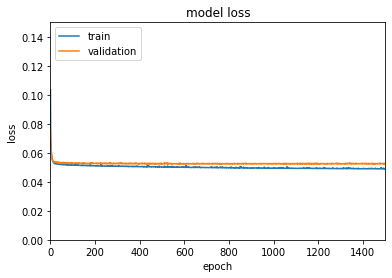

In [4]:
sa_data = pd.ExcelFile("CTGilmore.xlsx") 
parsee = sa_data.sheet_names[0]
data = sa_data.parse(parsee)
data_features = data.loc[:, data.columns] 
data_features = data_features.drop(['norm_id','AtRisk','Age',11142,12142], axis=1)  
scaled_data = scaler.transform(data_features)

encoder = Model(input_data, encoded)
encoded_data = encoder.predict(scaled_data)
#I now have scaled data as encoded which is my input. This will compare predictions to my scaled_data.
Y_train, Y_test = train_test_split(scaled_data, test_size=0.10, random_state=20) #Scaled data I want to compare to
X_train, X_test = train_test_split(encoded_data, test_size=0.10, random_state=20) #Encoded data I will input

dinput_size = 13
hidden_size1 = 30
hidden_size2 = 65
hidden_size3 = 120
decoded_dim = 148
dinput_data = Input(shape=(dinput_size,))
dhidden_d_1 = Dense(hidden_size1, activation='tanh')(dinput_data)
dhidden_d_2 = Dense(hidden_size2, activation='tanh')(dhidden_d_1)
dhidden_d_3 = Dense(hidden_size3, activation='tanh')(dhidden_d_2)
predictedSA = Dense(decoded_dim, activation='tanh')(dhidden_d_3)

predictor = Model(dinput_data, predictedSA)
predictor.compile(optimizer='Adam', loss='mean_absolute_error')
pn = predictor.fit(X_train, Y_train,
epochs=1500,
batch_size=15,
shuffle=True,
validation_data=(X_test, Y_test))

#print(ac.history.keys())
# "Loss"
plt.plot(pn.history['loss'])
plt.plot(pn.history['val_loss'])
#plt.set(xlim=(0, 50), ylim=(0.0, 1.0))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 1500, 0.0, 0.15])
plt.show()